In [1]:
#@title MIT License
#
# Copyright (c) 2020 Balázs Pintér 
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV, RandomizedSearchCV
import nltk
from nltk import word_tokenize
import pandas as pd

# Getting a corpus

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

# Small bag of words and TFIDF example

In [4]:
corpus = dataset.data[:30]
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=20)
bows = count_vectorizer.fit_transform(corpus)
pd.DataFrame(bows.toarray(), columns=count_vectorizer.get_feature_names())

,24,com,edu,file,gm,gov,imagine,info,information,key,like,line,list,mail,message,phone,st,time,use,volume
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0
9,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0


In [5]:
corpus = dataset.data[:30]
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=20)
bows = tfidf_vectorizer.fit_transform(corpus)
pd.DataFrame(bows.toarray(), columns=count_vectorizer.get_feature_names())

,24,com,edu,file,gm,gov,imagine,info,information,key,like,line,list,mail,message,phone,st,time,use,volume
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.449498,0.000000,0.000000,0.000000,0.491927,0.000000,0.449498,0.000000,0.000000,0.000000,0.449498,0.000000,0.000000,0.389696,0.00000
4,0.000000,0.000000,0.543319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.685850,0.000000,0.000000,0.000000,0.484163,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.842643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.627855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.778331,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483495,0.000000,0.00000


# Classifying topics

## Obtain labeled examples

In [6]:
num_of_features = 5000
num_of_examples = 10000

In [7]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=num_of_features)

In [8]:
corpus = dataset.data[:num_of_examples]

In [9]:
print(corpus[100])


I've been a very intent NREN spectator of the NREN for years.  As a 
commercial IP software vendor, it really is my professional opinion that the 
NREN, at this point, is irrelevant to private sector networking.  If it had 
been deployed five years ago, it would have been a major development.  Now,
however, it's just an upgrade to the NSFnet, and an attempt to revive the 
lagging use of the national supercomputer centers.  You could cut out the 
NSFnet completely, and the Internet would continue chugging along without a 
hiccup (aside from a few universities).

Long-haul networking and Internet connectivity have long since ceased to be 
under federal sponsorship or regulation, at least in the USA.  The success of 
the CIX (Commercial Internet Exchange) is a prime example of this.  While our 
dear VP has been promoting his "data superhighway," the private sector has 
been building it, without the NSFnet's restrictions.

To illustrate, a connection from the machine on my desk to the mac

In [10]:
bows = count_vectorizer.fit_transform(corpus)
bows

<10000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 442859 stored elements in Compressed Sparse Row format>

In [11]:
vocabulary = count_vectorizer.get_feature_names()
vocabulary

['00',
 '000',
 '005',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0d',
 '0i',
 '0m',
 '0q',
 '0qax',
 '0t',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '1024',
 '1024x768',
 '103',
 '104',
 '105',
 '106',
 '108',
 '109',
 '11',
 '110',
 '112',
 '117',
 '12',
 '120',
 '1200',
 '125',
 '127',
 '128',
 '129',
 '13',
 '130',
 '132',
 '133',
 '135',
 '13p',
 '13q',
 '14',
 '140',
 '144',
 '145',
 '146',
 '147',
 '149',
 '15',
 '150',
 '1542',
 '15o',
 '16',
 '160',
 '16m',
 '17',
 '170',
 '18',
 '180',
 '182',
 '19',
 '1914',
 '1915',
 '192',
 '1920',
 '1964',
 '1968',
 '1970',
 '1972',
 '1974',
 '1975',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '199',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1d',
 '1d9',
 '1d9l',
 '1eq',
 '1f',
 '1f9',
 '1mb',
 '1q',
 '1s',
 '1st',
 '1t',
 '1w',
 '1y',
 '1z4',
 '20',
 '200',
 '2000',
 '202',
 '205',
 '21',
 '210',
 '212',
 '213',
 '214',
 '22',
 '220',
 '225',
 '23'

In [12]:
bows[100]

<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [13]:
bows[100][bows[100].nonzero()]

matrix([[1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1,
         1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
         1, 1, 1, 1, 1, 2, 1, 1, 1]])

In [14]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['just',
 'continue',
 'aside',
 'use',
 'years',
 'article',
 'machine',
 'software',
 'commercial',
 'data',
 'posted',
 'internet',
 'uk',
 'usa',
 'major',
 'ago',
 'example',
 'point',
 'long',
 'connection',
 'professional',
 'building',
 'vendor',
 'exchange',
 'really',
 'appropriate',
 'private',
 'national',
 'irrelevant',
 've',
 'cut',
 'development',
 'completely',
 'attempt',
 'hits',
 'intent',
 'ip',
 'opinion',
 'sector',
 'networking',
 'upgrade',
 'centers',
 'federal',
 'regulation',
 'success',
 'prime',
 'dear',
 'restrictions',
 'desk',
 'involves',
 'gateway']

In [15]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
targets = dataset.target[:num_of_examples]

In [17]:
targets[:10]

array([17,  0, 17, 11, 10, 15,  4, 17, 13, 12])

In [18]:
set(targets)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

## Produce training and test data

In [19]:
test_proportion = 0.1
separating_index = int(len(targets) * (1-test_proportion))
X = bows[:separating_index]
y = targets[:separating_index]
X_test = bows[separating_index:]
y_test = targets[separating_index:]

In [20]:
X.shape, len(y), X_test.shape, len(y_test)

((9000, 5000), 9000, (1000, 5000), 1000)

## Classify and look at results

### Linear SVM - still one of the best for many NLP tasks
![title](SVM_hyperplanes.png)
![title](SVM_margin.png)

In [21]:
svc = svm.LinearSVC()
svc.fit(X, y)

/home/kevin/miniconda3/envs/dataS/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [22]:
svc.predict(X_test[:20]), y_test[:20]

(array([ 4, 11,  8,  3,  5,  9, 13,  2,  9,  1, 13, 10,  7,  0, 17,  6,  6,
         6, 13, 16]),
 array([ 3, 10,  8,  3,  0,  9,  6,  3,  0,  1, 13, 10,  7, 14, 13,  6,  6,
         6, 13,  8]))

In [23]:
svc.score(X_test, y_test)

0.591

### Confusion matrix
https://en.wikipedia.org/wiki/Confusion_matrix

In [24]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
#sum([confusion_matrix[i, i] for i in range(20)])
confusion_matrix[:15, :15]

array([[20,  0,  0,  1,  1,  1,  0,  0,  2,  1,  0,  2,  0,  1,  2],
       [ 0, 29,  0,  4,  3,  3,  1,  0,  0,  0,  0,  1,  1,  1,  1],
       [ 0,  2, 29,  3,  1,  3,  2,  0,  0,  2,  0,  0,  1,  0,  1],
       [ 0,  4,  6, 23,  8,  0,  1,  0,  0,  1,  0,  1,  3,  0,  0],
       [ 1,  0,  2,  4, 24,  1,  4,  0,  0,  6,  0,  0,  2,  1,  0],
       [ 2,  5,  5,  4,  0, 34,  0,  0,  2,  0,  0,  0,  1,  0,  0],
       [ 1,  2,  1,  3,  3,  0, 38,  2,  3,  2,  0,  0,  1,  2,  1],
       [ 2,  0,  0,  0,  0,  2,  1, 30,  5,  5,  1,  0,  0,  1,  1],
       [ 1,  0,  0,  1,  3,  0,  3,  5, 39,  0,  1,  0,  1,  3,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  3,  0, 40,  2,  0,  1,  0,  1],
       [ 1,  0,  0,  1,  0,  0,  1,  2,  1,  5, 38,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  1,  0,  0,  2,  0,  1, 34,  2,  2,  1],
       [ 2,  1,  2,  3,  7,  1,  1,  3,  0,  3,  0,  1, 26,  3,  1],
       [ 0,  0,  3,  2,  1,  1,  0,  1,  1,  2,  0,  0,  4, 41,  2],
       [ 2,  2,  1,  0,  2,  1,  0

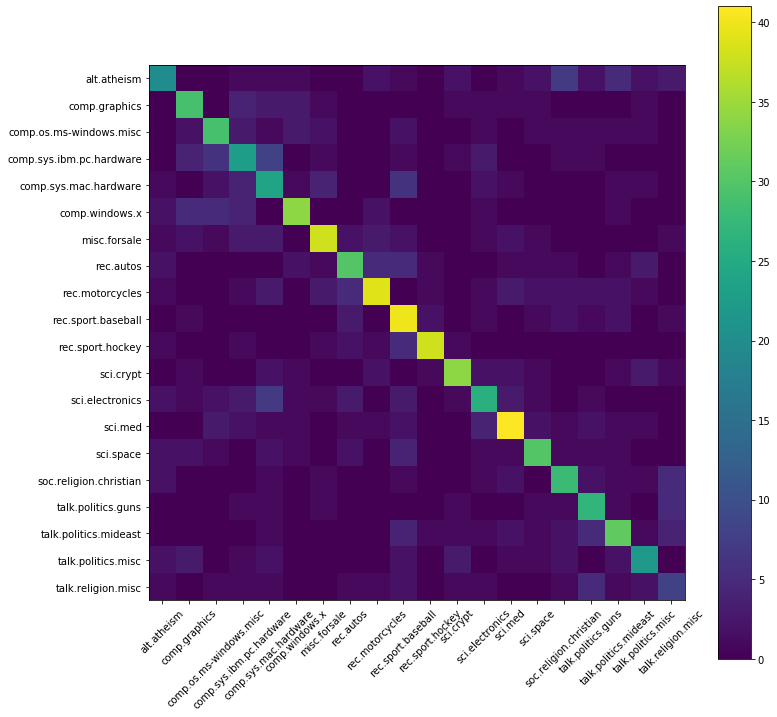

In [25]:
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix)
plt.yticks(np.arange(len(dataset.target_names)), dataset.target_names)
plt.xticks(np.arange(len(dataset.target_names)), dataset.target_names, rotation=45)
plt.colorbar()

## Cross-validation
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [26]:
X, X_test, y, y_test = train_test_split(bows, targets, test_size=0.1, shuffle=False)

In [27]:
X.shape, len(y), X_test.shape, len(y_test)

((9000, 5000), 9000, (1000, 5000), 1000)

In [28]:
svc = svm.LinearSVC()
svc.fit(X, y)
svc.score(X_test, y_test)

0.591

In [29]:
X, X_test, y, y_test = train_test_split(bows, targets, test_size=0.1, shuffle=True)

In [30]:
svc = svm.LinearSVC()
svc.fit(X, y)
svc.score(X_test, y_test)

0.585

### K-fold

In [31]:
cross_val_score(svc, bows, targets, cv=10)

/home/kevin/miniconda3/envs/dataS/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.614, 0.597, 0.595, 0.598, 0.572, 0.584, 0.575, 0.595, 0.606,
       0.591])

In [32]:
cvr = cross_val_score(svc, bows, targets, cv=KFold(n_splits=10))
cvr.mean(), cvr.std()

(0.5923, 0.016431981012647274)

### Shuffle and split

In [33]:
cross_val_score(svc, bows, targets, cv=ShuffleSplit(n_splits=10, test_size=0.05))

array([0.588, 0.606, 0.618, 0.578, 0.578, 0.6  , 0.61 , 0.576, 0.604,
       0.592])

# TF-IDF
https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_of_features, stop_words='english')

In [35]:
bows = tfidf_vectorizer.fit_transform(corpus)
bows

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 442859 stored elements in Compressed Sparse Row format>

In [36]:
vocabulary = tfidf_vectorizer.get_feature_names()
vocabulary

['00',
 '000',
 '005',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0d',
 '0i',
 '0m',
 '0q',
 '0qax',
 '0t',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '1024',
 '1024x768',
 '103',
 '104',
 '105',
 '106',
 '108',
 '109',
 '11',
 '110',
 '112',
 '117',
 '12',
 '120',
 '1200',
 '125',
 '127',
 '128',
 '129',
 '13',
 '130',
 '132',
 '133',
 '135',
 '13p',
 '13q',
 '14',
 '140',
 '144',
 '145',
 '146',
 '147',
 '149',
 '15',
 '150',
 '1542',
 '15o',
 '16',
 '160',
 '16m',
 '17',
 '170',
 '18',
 '180',
 '182',
 '19',
 '1914',
 '1915',
 '192',
 '1920',
 '1964',
 '1968',
 '1970',
 '1972',
 '1974',
 '1975',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '199',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1d',
 '1d9',
 '1d9l',
 '1eq',
 '1f',
 '1f9',
 '1mb',
 '1q',
 '1s',
 '1st',
 '1t',
 '1w',
 '1y',
 '1z4',
 '20',
 '200',
 '2000',
 '202',
 '205',
 '21',
 '210',
 '212',
 '213',
 '214',
 '22',
 '220',
 '225',
 '23'

In [37]:
bows[100][bows[100].nonzero()]

matrix([[0.1217704 , 0.12396602, 0.12396602, 0.24112977, 0.11607488,
         0.11801699, 0.1116944 , 0.13124285, 0.09774842, 0.12492026,
         0.10961078, 0.26114656, 0.24793204, 0.09261585, 0.24887435,
         0.11767926, 0.24272008, 0.10224323, 0.09344358, 0.09810508,
         0.09421076, 0.06194238, 0.11871091, 0.08637652, 0.19365735,
         0.09999582, 0.06411778, 0.114595  , 0.12644755, 0.0973983 ,
         0.11269889, 0.10530919, 0.13926796, 0.06703891, 0.07746531,
         0.07855355, 0.08723946, 0.10151207, 0.10379537, 0.28503022,
         0.08703683, 0.08007725, 0.30628421, 0.08074182, 0.17447892,
         0.08235383, 0.13450421, 0.1115684 , 0.1091771 , 0.09834661,
         0.04815671]])

In [38]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['gateway',
 'involves',
 'desk',
 'restrictions',
 'dear',
 'prime',
 'success',
 'regulation',
 'federal',
 'centers',
 'upgrade',
 'networking',
 'sector',
 'opinion',
 'ip',
 'intent',
 'hits',
 'attempt',
 'completely',
 'development',
 'cut',
 've',
 'irrelevant',
 'national',
 'private',
 'appropriate',
 'really',
 'exchange',
 'vendor',
 'building',
 'professional',
 'connection',
 'long',
 'point',
 'example',
 'ago',
 'major',
 'usa',
 'uk',
 'internet',
 'posted',
 'data',
 'commercial',
 'software',
 'machine',
 'article',
 'years',
 'use',
 'aside',
 'continue',
 'just']

In [39]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, targets, cv=10)

array([0.723, 0.682, 0.702, 0.687, 0.677, 0.688, 0.68 , 0.704, 0.701,
       0.679])

# Stemming and lemmatizing

In [40]:
stemmer = nltk.stem.PorterStemmer()

In [41]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [42]:
stemmer.stem('houses'), stemmer.stem('goes'), stemmer.stem('went'), stemmer.stem('mice')

('hous', 'goe', 'went', 'mice')

In [43]:
lemmatizer.lemmatize('houses'), lemmatizer.lemmatize('goes'), lemmatizer.lemmatize('went'), lemmatizer.lemmatize('mice')

('house', 'go', 'went', 'mouse')

## Helper class to transform words in the vectorizers

In [44]:
class TransformTokenizer:
    def __init__(self, transform):
        self.transform = transform
        
    def __call__(self, doc):
        return [self.transform(word) for word in word_tokenize(doc)]

## Stemming

In [45]:
tfidf_vectorizer_stemming = TfidfVectorizer(tokenizer=TransformTokenizer(stemmer.stem), max_df=0.95, min_df=2, max_features=num_of_features, stop_words='english')

In [46]:
bows = tfidf_vectorizer_stemming.fit_transform(corpus)
bows

/home/kevin/miniconda3/envs/dataS/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in 

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 559936 stored elements in Compressed Sparse Row format>

In [47]:
vocabulary = tfidf_vectorizer_stemming.get_feature_names()
vocabulary

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'+",
 "',3",
 "'-",
 "'92",
 "'93",
 "'a",
 "'ax",
 "'ax=",
 "'d",
 "'em",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'the",
 "'ve",
 '(',
 ')',
 '*',
 '+',
 '+/-',
 '+1',
 '+y',
 ',',
 ',3',
 ',8',
 ',c',
 '-',
 '-+',
 '--',
 '-0',
 '-1',
 '-2',
 '-3',
 '-4',
 '-5',
 '-6',
 '-8',
 '-9',
 '-l',
 '-r',
 '-s',
 '-|',
 '.',
 '..',
 '...',
 '....',
 '.....',
 '......',
 '.......',
 '.500',
 '.ck',
 '.d',
 '.i',
 '.lk',
 '.m',
 '.s',
 '.sl',
 '/',
 '/-',
 '//',
 '/3',
 '/3t',
 '/=',
 '0',
 "0'=",
 '0.',
 '0.0',
 '0.00',
 '0.333',
 '0.5',
 '0.500',
 '0.70',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '0d',
 '0t',
 '0t-',
 '1',
 '1,000',
 '1-0',
 '1.',
 '1.0',
 '1.00',
 '1.1',
 '1.2',
 '1.3',
 '1.40',
 '1.5',
 '1.50',
 '1.75',
 '1/',
 '1/2',
 '1/4',
 '10',
 '10.',
 '10.00',
 '100',
 '100,000',
 '1000',
 '101',
 '102',
 '1024',
 '1024x768',
 '104',
 '105',
 '106',
 '109',
 '11',
 '110',
 '112',
 '12',
 '120',
 '1200',
 '125',
 '127',
 '128',
 '13',
 '130

In [48]:
bows[100][bows[100].nonzero()]

matrix([[0.11462333, 0.11741971, 0.11699286, 0.1103546 , 0.11156442,
         0.10441878, 0.09248881, 0.13279018, 0.22779523, 0.07937639,
         0.09678432, 0.09032789, 0.17070666, 0.08092592, 0.08673176,
         0.05975004, 0.1103546 , 0.07639906, 0.1903887 , 0.18183896,
         0.09361591, 0.06105434, 0.10379675, 0.07789991, 0.10977866,
         0.07964356, 0.07621989, 0.10168277, 0.05273952, 0.06775515,
         0.07149821, 0.09650946, 0.06086217, 0.07468236, 0.12477508,
         0.05456281, 0.04742942, 0.2721604 , 0.08610616, 0.07662553,
         0.16600978, 0.09692333, 0.17378317, 0.07680877, 0.28751997,
         0.07690109, 0.07216303, 0.04835511, 0.1564909 , 0.07451929,
         0.06635696, 0.08408568, 0.07552041, 0.11123915, 0.05975004,
         0.08549457, 0.11193299, 0.10441878, 0.07693962, 0.08083523,
         0.08498832, 0.10379675, 0.04027572, 0.0790609 , 0.06401908,
         0.06016833, 0.10905328, 0.04579183, 0.25698867, 0.11633353,
         0.11967187, 0.26022663]])

In [49]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['gateway',
 'desk',
 'illustr',
 'dear',
 'prime',
 'regul',
 'feder',
 'deploy',
 'sector',
 'opinion',
 'intent',
 'success',
 'hit',
 'involv',
 'cut',
 "'ve",
 'irrelev',
 'nation',
 'restrict',
 'privat',
 'appropri',
 'realli',
 'exchang',
 'develop',
 'vendor',
 'build',
 'univers',
 'profession',
 'hi',
 'long',
 'exampl',
 'upgrad',
 'sinc',
 'ago',
 'ceas',
 'veri',
 '...',
 'internet',
 'center',
 'major',
 'connect',
 'usa',
 'network',
 'data',
 'commerci',
 'softwar',
 'provid',
 'onli',
 'machin',
 'articl',
 'howev',
 'use',
 'complet',
 '*',
 'post',
 'ha',
 'year',
 'promot',
 "''",
 '``',
 'attempt',
 'asid',
 'wa',
 'continu',
 'thi',
 'point',
 "'s",
 'just',
 ',',
 ')',
 '(',
 '.']

In [50]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, targets, cv=10)

array([0.71 , 0.68 , 0.709, 0.713, 0.696, 0.701, 0.685, 0.705, 0.728,
       0.684])

## Lemmatizing

In [51]:
tfidf_vectorizer_lemmatizing = TfidfVectorizer(tokenizer=TransformTokenizer(lemmatizer.lemmatize), max_df=0.95, min_df=2, max_features=num_of_features, stop_words='english')

In [52]:
bows = tfidf_vectorizer_lemmatizing.fit_transform(corpus)
bows

/home/kevin/miniconda3/envs/dataS/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 513163 stored elements in Compressed Sparse Row format>

In [53]:
vocabulary = tfidf_vectorizer_lemmatizing.get_feature_names()
vocabulary

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'+",
 "',3",
 "'-",
 "'92",
 "'93",
 "'as",
 "'ax",
 "'d",
 "'em",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'the",
 "'ve",
 '(',
 ')',
 '*',
 '+',
 '+/-',
 '+1',
 '+y',
 ',',
 ',3',
 ',8',
 '-',
 '-+',
 '--',
 '-1',
 '-2',
 '-3',
 '-4',
 '-6',
 '-l',
 '-r',
 '-s',
 '-|',
 '.',
 '..',
 '...',
 '....',
 '.....',
 '......',
 '.......',
 '.500',
 '.ck',
 '.i',
 '.lk',
 '.sl',
 '/',
 '/-',
 '//',
 '/3',
 '/3t',
 '0',
 "0'=",
 '0.0',
 '0.00',
 '0.333',
 '0.5',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '0d',
 '0t-',
 '1',
 '1-0',
 '1.',
 '1.0',
 '1.00',
 '1.1',
 '1.2',
 '1.40',
 '1.5',
 '1.50',
 '1.75',
 '1/',
 '1/2',
 '1/4',
 '10',
 '10.00',
 '100',
 '100,000',
 '1000',
 '101',
 '1024',
 '1024x768',
 '104',
 '105',
 '109',
 '11',
 '110',
 '12',
 '120',
 '1200',
 '125',
 '128',
 '13',
 '130',
 '14',
 '140',
 '145',
 '15',
 '15.00',
 '150',
 '15o',
 '16',
 '16-bit',
 '160',
 '16m',
 '17',
 '18',
 '19',
 '1914',
 '1915',
 '1919',
 '1920',
 '1968',
 '1

In [54]:
bows[100][bows[100].nonzero()]

matrix([[0.11506481, 0.13145009, 0.11753561, 0.11709966, 0.21895888,
         0.11005381, 0.11157497, 0.10544252, 0.11222115, 0.09279   ,
         0.24886996, 0.22717432, 0.07916003, 0.11126033, 0.17428306,
         0.09067166, 0.08859645, 0.09223671, 0.08923129, 0.05958718,
         0.1125531 , 0.08208152, 0.18404009, 0.0948088 , 0.06088792,
         0.10734861, 0.10947944, 0.09087267, 0.1017711 , 0.08183454,
         0.1033117 , 0.09652051, 0.06757047, 0.07130332, 0.07447879,
         0.04730014, 0.27171595, 0.08657487, 0.08271414, 0.09665914,
         0.08317052, 0.07659941, 0.29167361, 0.07669148, 0.15606435,
         0.07431618, 0.10602959, 0.11093594, 0.08526153, 0.11162789,
         0.0767299 , 0.08061489, 0.10351383, 0.04016594, 0.09324514,
         0.06155513, 0.10875603, 0.04566701, 0.25628819, 0.11601644,
         0.11934568, 0.25951732]])

In [55]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['gateway',
 'provider',
 'involves',
 'desk',
 'restriction',
 'dear',
 'prime',
 'success',
 'regulation',
 'federal',
 'networking',
 'sector',
 'opinion',
 'intent',
 'hit',
 'attempt',
 'completely',
 'development',
 'cut',
 "'ve",
 'irrelevant',
 'national',
 'private',
 'appropriate',
 'really',
 'exchange',
 'vendor',
 'building',
 'upgrade',
 'university',
 'professional',
 'connection',
 'long',
 'example',
 'ago',
 '...',
 'internet',
 'center',
 'major',
 'usa',
 'posted',
 'data',
 'commercial',
 'software',
 'machine',
 'article',
 'use',
 '*',
 'ha',
 'year',
 "''",
 '``',
 'aside',
 'wa',
 'continue',
 'point',
 "'s",
 'just',
 ',',
 ')',
 '(',
 '.']

In [56]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, targets, cv=10).mean()

0.6971

# Grid search and randomized search

In [57]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge']}

In [58]:
X, X_test, y, y_test = train_test_split(bows, targets, test_size=0.1, shuffle=False)

In [59]:
svc = svm.LinearSVC()
grid_search = GridSearchCV(svc, param_grid, n_jobs=-1, return_train_score=False)
grid_search.fit(X, y)

/home/kevin/miniconda3/envs/dataS/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']})

In [60]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.511374,0.102587,0.005895,0.000470,0.01,hinge,"{'C': 0.01, 'loss': 'hinge'}",0.682222,0.671667,0.670556,0.658889,0.685556,0.673778,0.009450,4
1,1.165862,0.134254,0.006068,0.002729,0.01,squared_hinge,"{'C': 0.01, 'loss': 'squared_hinge'}",0.618889,0.602222,0.607222,0.597778,0.622222,0.609667,0.009439,10
2,2.114939,0.098881,0.004953,0.000326,0.1,hinge,"{'C': 0.1, 'loss': 'hinge'}",0.682222,0.666667,0.670556,0.661111,0.682222,0.672556,0.008444,5
3,1.030652,0.060424,0.004886,0.000385,0.1,squared_hinge,"{'C': 0.1, 'loss': 'squared_hinge'}",0.688889,0.682222,0.667778,0.665000,0.689444,0.678667,0.010379,3
4,4.445506,0.500656,0.005365,0.000743,1,hinge,"{'C': 1, 'loss': 'hinge'}",0.694444,0.695556,0.683889,0.677222,0.707778,0.691778,0.010502,1
5,1.610559,0.134627,0.004801,0.000448,1,squared_hinge,"{'C': 1, 'loss': 'squared_hinge'}",0.686667,0.689444,0.683889,0.666667,0.700556,0.685444,0.010962,2
6,10.314700,0.285676,0.005370,0.001162,10,hinge,"{'C': 10, 'loss': 'hinge'}",0.644444,0.642222,0.642778,0.631111,0.666111,0.645333,0.011410,7
7,6.070174,0.342933,0.004652,0.000326,10,squared_hinge,"{'C': 10, 'loss': 'squared_hinge'}",0.647222,0.651667,0.647778,0.637222,0.680000,0.652778,0.014423,6
8,11.767291,0.371840,0.005736,0.001822,100,hinge,"{'C': 100, 'loss': 'hinge'}",0.609444,0.615556,0.613333,0.606111,0.633889,0.615667,0.009670,9
9,12.071483,1.194266,0.003541,0.000315,100,squared_hinge,"{'C': 100, 'loss': 'squared_hinge'}",0.608333,0.617778,0.621111,0.612222,0.640000,0.619889,0.010979,8


In [61]:
grid_search.score(X_test, y_test)

0.714

In [62]:
svc = svm.LinearSVC()
random_search = RandomizedSearchCV(svc, param_grid, n_iter=4, n_jobs=-1, return_train_score=False)
random_search.fit(X, y)

/home/kevin/miniconda3/envs/dataS/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RandomizedSearchCV(estimator=LinearSVC(), n_iter=4, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'loss': ['hinge', 'squared_hinge']})

In [63]:
import pandas as pd
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.046391,0.038306,0.004673,0.000614,squared_hinge,0.1,"{'loss': 'squared_hinge', 'C': 0.1}",0.688889,0.682222,0.667778,0.665000,0.689444,0.678667,0.010379,3
1,9.588571,0.416845,0.004430,0.000423,hinge,10,"{'loss': 'hinge', 'C': 10}",0.642778,0.640556,0.643333,0.632778,0.665556,0.645000,0.010949,4
2,3.899973,0.552134,0.003987,0.000946,hinge,1,"{'loss': 'hinge', 'C': 1}",0.694444,0.695000,0.683889,0.677222,0.706667,0.691444,0.010126,1
3,1.347680,0.068620,0.004561,0.000504,squared_hinge,1,"{'loss': 'squared_hinge', 'C': 1}",0.686667,0.689444,0.683889,0.666667,0.700556,0.685444,0.010962,2


In [64]:
random_search.score(X_test, y_test)

0.715